In [4]:
import pandas as pd 
houseData=pd.read_csv("../../data/csvData/bostonhousing.csv")

In [5]:
houseData

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,5.44114,0.0,18.10,0,0.713,6.655,98.2,2.3552,24,666,20.2,355.29,17.73,15.2
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1
453,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8
454,9.51363,0.0,18.10,0,0.713,6.728,94.1,2.4961,24,666,20.2,6.68,18.71,14.9


In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model= Sequential()
model.add(Dense(16,input_dim=13,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="linear"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss="mse",optimizer="rmsprop",metrics=['mae'])

In [8]:
from sklearn.model_selection import train_test_split

houseDataX=houseData.loc[:,'crim':'lstat']
houseDataY=houseData.loc[:,['medv']]

X_train, X_test, y_train, y_test = train_test_split(houseDataX, houseDataY, test_size=0.1,random_state=42)

In [9]:
print(houseDataY.size)
print(y_train.size)
print(y_test.size)

456
410
46


In [10]:
houseDataX

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,5.44114,0.0,18.10,0,0.713,6.655,98.2,2.3552,24,666,20.2,355.29,17.73
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
453,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666,20.2,375.87,16.74
454,9.51363,0.0,18.10,0,0.713,6.728,94.1,2.4961,24,666,20.2,6.68,18.71


In [11]:
houseDataY

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
451,15.2
452,16.1
453,17.8
454,14.9


In [12]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
70,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305,19.2,383.73,6.72
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307,17.4,390.07,4.73
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,100.19,16.22
297,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,16.0,396.90,15.84
261,0.53412,20.0,3.97,0,0.647,7.520,89.4,2.1398,5,264,13.0,388.37,7.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [14]:
y_train

,medv
70,24.2
237,31.5
433,14.3
297,20.3
261,43.1
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [7]:
result=model.fit(X_train,y_train,validation_split=0.2,epochs=50,batch_size=8)

Epoch 1/50
41/41 [==============================] - 0s 2ms/step - loss: 17898.4297 - mae: 102.6495 - val_loss: 1229.5385 - val_mae: 32.0979
Epoch 2/50
41/41 [==============================] - 0s 748us/step - loss: 7249.3833 - mae: 64.8321 - val_loss: 720.8016 - val_mae: 24.5681
Epoch 3/50
41/41 [==============================] - 0s 752us/step - loss: 5050.0884 - mae: 53.1178 - val_loss: 449.1451 - val_mae: 18.8486
Epoch 4/50
41/41 [==============================] - 0s 750us/step - loss: 3026.9854 - mae: 40.8310 - val_loss: 249.7738 - val_mae: 13.3154
Epoch 5/50
41/41 [==============================] - 0s 758us/step - loss: 1400.7969 - mae: 28.8966 - val_loss: 286.2236 - val_mae: 14.5476
Epoch 6/50
41/41 [==============================] - 0s 768us/step - loss: 905.1240 - mae: 22.7320 - val_loss: 305.3823 - val_mae: 15.2465
Epoch 7/50
41/41 [==============================] - 0s 760us/step - loss: 657.1866 - mae: 19.8870 - val_loss: 289.0021 - val_mae: 14.7612
Epoch 8/50
41/41 [==========

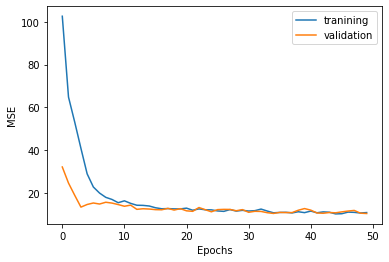

In [8]:
import matplotlib.pyplot as plt
plt.plot(result.history['mae'],label="tranining")
plt.plot(result.history['val_mae'],label="validation")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [9]:
model.evaluate(X_test,y_test,batch_size=8)

6/6 [==============================] - 0s 904us/step - loss: 94.4827 - mae: 8.5317


[94.48265838623047, 8.531725883483887]

In [10]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
houseDataX=houseData.loc[:,'crim':'lstat']
scaledHouseDataX=pd.DataFrame(scaler.fit_transform(houseDataX),columns=houseDataX.columns)

houseDataY=houseData.loc[:,['medv']]
X_train, X_test, y_train, y_test = train_test_split(scaledHouseDataX, houseDataY, test_size=0.1,random_state=42)

In [11]:
modelScaled= Sequential()
modelScaled.add(Dense(16,input_dim=13,activation="relu"))
modelScaled.add(Dropout(0.5))
modelScaled.add(Dense(16,activation="relu"))
modelScaled.add(Dropout(0.5))
modelScaled.add(Dense(1,activation="linear"))
modelScaled.compile(loss="mse",optimizer="rmsprop",metrics=['mae'])
resultScaled=modelScaled.fit(X_train,y_train,validation_split=0.2,epochs=50,batch_size=8)

Epoch 1/50
41/41 [==============================] - 0s 2ms/step - loss: 597.4022 - mae: 22.3792 - val_loss: 572.6307 - val_mae: 22.3115
Epoch 2/50
41/41 [==============================] - 0s 757us/step - loss: 563.5384 - mae: 21.5723 - val_loss: 538.2069 - val_mae: 21.5132
Epoch 3/50
41/41 [==============================] - 0s 804us/step - loss: 514.0822 - mae: 20.4316 - val_loss: 493.0977 - val_mae: 20.4367
Epoch 4/50
41/41 [==============================] - 0s 789us/step - loss: 464.1534 - mae: 19.0077 - val_loss: 440.1032 - val_mae: 19.1121
Epoch 5/50
41/41 [==============================] - 0s 763us/step - loss: 400.2249 - mae: 17.5911 - val_loss: 376.2226 - val_mae: 17.4286
Epoch 6/50
41/41 [==============================] - 0s 779us/step - loss: 348.4387 - mae: 16.1156 - val_loss: 303.2914 - val_mae: 15.3266
Epoch 7/50
41/41 [==============================] - 0s 749us/step - loss: 289.3452 - mae: 14.2183 - val_loss: 232.2036 - val_mae: 13.0685
Epoch 8/50
41/41 [==================

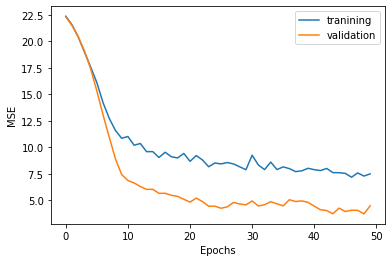

In [12]:
plt.plot(resultScaled.history['mae'],label="tranining")
plt.plot(resultScaled.history['val_mae'],label="validation")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [13]:
modelScaled.evaluate(X_test,y_test,batch_size=8)

6/6 [==============================] - 0s 957us/step - loss: 19.1616 - mae: 3.5948


[19.161582946777344, 3.5947630405426025]

In [14]:
modelScaled.save('housepredicterWeight.h5')

In [16]:
predictHousePriceData= pd.read_csv("../data/csvData/BostonHousePricePredict.csv")
predictHousePriceData

scaler=StandardScaler()
housePredDataX=predictHousePriceData.loc[:,:]
scaledPrediHouseDataX=pd.DataFrame(scaler.fit_transform(housePredDataX),columns=housePredDataX.columns)
scaledPrediHouseDataX

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.106957,0.0,0.206351,0.0,1.975618,-0.234835,0.636019,-0.184357,0.743782,0.536938,0.193247,-3.726747,0.857509
1,0.961728,0.0,0.206351,0.0,1.975618,-0.326461,0.198101,0.191241,0.743782,0.536938,0.193247,-3.802013,0.431798
2,0.853216,0.0,0.206351,0.0,1.975618,0.509619,0.394011,0.198617,0.743782,0.536938,0.193247,-0.904509,0.285782
3,0.623036,0.0,0.206351,0.0,1.975618,0.005681,0.434346,0.074552,0.743782,0.536938,0.193247,0.440025,-0.028874
4,0.141639,0.0,0.206351,0.0,1.975618,1.425872,0.757023,-0.152395,0.743782,0.536938,0.193247,-1.087605,0.324856
5,-0.129192,0.0,0.206351,0.0,1.975618,0.681417,0.664830,-0.209889,0.743782,0.536938,0.193247,0.381041,-0.039157
6,0.587640,0.0,0.206351,0.0,1.975618,0.546270,0.353677,0.106514,0.743782,0.536938,0.193247,0.440025,-0.174891
7,0.385847,0.0,0.206351,0.0,1.975618,0.995233,0.751261,0.233605,0.743782,0.536938,0.193247,0.406813,-0.935823
8,0.874294,0.0,0.206351,0.0,0.885777,0.298881,-0.660450,0.539606,0.743782,0.536938,0.193247,0.440025,-0.333247
9,-0.257346,0.0,0.206351,0.0,0.885777,-0.731902,-1.651529,0.734591,0.743782,0.536938,0.193247,-0.233914,-0.146099


In [17]:
from keras.models import load_model

# Recreate the model from file
loadedModel = load_model('housepredicterWeight.h5')

#predict
predictedHousePrice=loadedModel.predict(scaledPrediHouseDataX)

In [18]:
predictedHousePrice

array([[10.834002 ],
       [10.124189 ],
       [10.38346  ],
       [11.257289 ],
       [12.600364 ],
       [13.599207 ],
       [12.073656 ],
       [16.828375 ],
       [ 9.269688 ],
       [ 7.9024525],
       [10.010508 ],
       [ 8.849022 ],
       [ 7.368186 ],
       [ 7.2939577],
       [ 9.797507 ],
       [14.8216505],
       [13.287899 ],
       [19.382883 ],
       [10.103472 ],
       [ 8.824078 ],
       [11.604306 ],
       [ 8.914932 ],
       [10.10713  ],
       [12.8744335],
       [12.755675 ],
       [20.753473 ],
       [23.971243 ],
       [11.467026 ],
       [ 9.377488 ],
       [12.892057 ],
       [ 8.787354 ],
       [ 9.627386 ],
       [18.130726 ],
       [16.06803  ],
       [14.591427 ],
       [19.736746 ],
       [20.83489  ],
       [27.85281  ],
       [27.959799 ],
       [24.002401 ],
       [19.730715 ],
       [25.353205 ],
       [29.35571  ],
       [24.440905 ],
       [28.19535  ],
       [34.1525   ],
       [32.65118  ],
       [44.25

In [19]:
outputPrice= pd.DataFrame(pd.concat([housePredDataX,pd.DataFrame(predictedHousePrice,columns=["PredPrice"])],axis=1))
outputPrice

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,PredPrice
0,4.66883,0,18.10,0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01,10.834002
1,8.20058,0,18.10,0,0.713,5.936,80.3,2.7792,24,666,20.2,3.50,16.94,10.124189
2,7.75223,0,18.10,0,0.713,6.301,83.7,2.7831,24,666,20.2,272.21,16.23,10.383460
3,6.80117,0,18.10,0,0.713,6.081,84.4,2.7175,24,666,20.2,396.90,14.70,11.257289
4,4.81213,0,18.10,0,0.713,6.701,90.0,2.5975,24,666,20.2,255.23,16.42,12.600364
5,3.69311,0,18.10,0,0.713,6.376,88.4,2.5671,24,666,20.2,391.43,14.65,13.599207
6,6.65492,0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,12.073656
7,5.82115,0,18.10,0,0.713,6.513,89.9,2.8016,24,666,20.2,393.82,10.29,16.828375
8,7.83932,0,18.10,0,0.655,6.209,65.4,2.9634,24,666,20.2,396.90,13.22,9.269688
9,3.16360,0,18.10,0,0.655,5.759,48.2,3.0665,24,666,20.2,334.40,14.13,7.902452


In [20]:
outputPrice.to_csv("predictedPriceOutput.csv")